<a href="https://colab.research.google.com/github/Victoriambaka/PROJECT-15/blob/main/Incognito_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phising Websites

## 1. Defining the Question

### a) Specifying the Question

**Problem Statement**

In recent years, phishing has gotten increasingly complex, frequent, and unfortunately, successful. It is, however, very difficult to determine if a website URL is actually legitimate or not. Hence, this project seeks to address fake URLs and domain names through the identification of phishing website links before the user actually clicks on the link for access. This will allow all users to be able to check for the legitimacy of a URL which will in turn reduce security risks to individuals and organizations at large.

**Specific Objectives**

* To identify phishing sites using a TensorFlow Model
* To Implement feature extraction to detect fake websites 
* To identify the trend/similarity between phishing URLs

**Research Questions**

* Can we identify phishing websites to prevent attacks?
* How to apply Machine Learning and necessary classification methods to classify malicious vs legitimate websites?
* Are there components for detection and classification of phishing websites? 




### b) Defining the Metric for Success

This project will be successful when: 

* Having a model that will assess URL link and tag it as legitimate or not at 85% accuracy.


### c) Understanding the context 

**Proposed Solution**

The expectation from this project is that it will give us better insight on phishing, i.e how to identify phishing websites from legitimate websites by selecting the best algorithm and have it embedded in browsers in the form of extensions that detect the phishing sites. Through this, we will be able to prevent and educate Internet Users on the deceptive ways of phishers through URLs and thus reduce the rate of financial theft from users and organizations online.

**Justification of the Study**

With the presence of numerous websites on the World Wide Web, there have been several fraudulent websites that have been developed to resemble the actual reputable websites. The main purpose of these forged websites is to trick the victims by requesting them to enter personal information such as their credit card number, password, etc., leading to the loss of financial assets from users and organizations that has cost the stakeholders so many financial resources.

With the information above we seek to identify robust countermeasures through Machine Learning and neural networks that can point out phishing sites through their URL detection, thus justifying the need to conduct this study.

**Scope of the Study**

This study explored machine learning models that use datasets obtained from open source platforms in order to analyze website links and distinguish between phishing and legitimate URL links.


>

### d) Recording the Experimental Design

Experimental Procedure:

1.   Randomly partition each dataset into two parts i.e 80 - 20  sets.
2.   For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.
3. Compute the accuracy (percentage of correct classification).
4. Report the confusion matrix of each classifier.
5. Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
6. Suggest and apply at least one of the optimization techniques that you learned earlier this week.
7. Provide further recommendations to improve the classifier.
 



### e) Data Relevance

In this project, a dataset containing information for Phishing sites was collected from Kaggle data for Phishing Site URLs.
https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls?select=phishing_site_urls.csv

**Describing and Exploring Data**

* The dataset includes fields that represent all of our primary data related to Phishing Sites.
* Data contains 549,346 entries.
* There are two columns.
* Label column is prediction col which has 2 categories:
** A. Good - which means the URLs are not containing malicious stuff and this site is not a Phishing Site.
** B. Bad - which means the URLs contain malicious stuff and this site is a Phishing Site.
There is no missing value in the dataset

**Verifying Data Quality**

The data set is generally clean and does not require much cleaning. A more detailed cleaning will be done during data preparation.



## 2. Reading the Data

In [ ]:
# Installing packages
!pip install factor_analyzer==0.2.3
!pip install tldextract
!pip install selenium
!pip install imbalanced-learn
!pip install wordcloud
!pip install selenium

     |████████████████████████████████| 93 kB 1.6 MB/s 
     |████████████████████████████████| 979 kB 5.0 MB/s 
     |████████████████████████████████| 359 kB 19.5 MB/s 
     |████████████████████████████████| 138 kB 57.2 MB/s 
     |████████████████████████████████| 55 kB 4.4 MB/s 
     |████████████████████████████████| 4.0 MB 44.5 MB/s 
     |████████████████████████████████| 58 kB 5.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from scipy.stats import bartlett, chi2, loguniform
import os
from scipy import stats
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import FactorAnalyzer
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import bartlett
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import tldextract
import time
from nltk.tokenize import RegexpTokenizer 
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.pipeline import make_pipeline 
from PIL import Image
from bs4 import BeautifulSoup
from selenium import webdriver 
import networkx as nx 
import pickle
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from imblearn.over_sampling import SMOTE
from collections import Counter
import tensorflow as tf
from selenium import webdriver
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from collections import Counter
sb.set(rc={'figure.figsize':(30, 5)})
from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Machine Learning: Supervised/ML_Project')

Mounted at /content/drive


In [ ]:
# Loading the Dataset 
df = pd.read_csv('phishing_site_urls.csv')

## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
print(df.shape)

(549346, 2)


In [ ]:
# Previewing the top of our dataset
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [ ]:
# Previewing the bottom of our dataset
df.tail() 

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [ ]:
# Checking whether each column has an appropriate datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


## 4. External Data Source Validation

> We don't have any other external data set to compare with this data set

## 5. Data Preperation/Tidying the Dataset

### a.Validation

In [ ]:
# Checking for irrelevant columns
df.columns

Index(['URL', 'Label'], dtype='object')

> All columns are valid

### b. Completeness

In [ ]:
# Checking for missing values
df.isnull().any().any()

False

In [ ]:
# Identifying the Missing Data
df.isnull().sum()

URL      0
Label    0
dtype: int64

> No missing values

In [ ]:
# Checking percentage of missing values per columns
missing_columns = []
for i, col in enumerate(df.columns):
  missing = (df[col].isnull().sum()/df.shape[0])*100
  if missing > 0:
    missing_columns.append(col)
  print(f'{i+1}. {col} = {(df[col].isnull().sum()/df.shape[0])*100}%')

1. URL = 0.0%
2. Label = 0.0%


In [ ]:
# The columns with missing values
missing_columns

[]

### c. Consistency

In [ ]:
# Checking for duplicates
df.duplicated().any().any()

True

In [ ]:
# Dropping duplicates
df.drop_duplicates(inplace = True)
# Checking changes
df.duplicated().any().any()

False

> The duplicate data in our dataset have been dropped. The result dataset has no duplicates.

In [ ]:
# Determining the no. of records in our dataset
print(df.shape)

(507196, 2)


### d. Uniformity

In [ ]:
# Checking column names
df.columns

Index(['URL', 'Label'], dtype='object')

> The columns naming is uniform but will change them to lower case

In [ ]:
# Changing all column names to lower case
df.columns = df.columns.str.lower()
# Checking changes
df.columns

Index(['url', 'label'], dtype='object')

### e. Outliers

All our columns are categorical

### f. Anomalies

> All our columns are categorical

## 6. Exploratory Descriptive Analysis

##### Categorical Analysis

In [ ]:
# Number of unique values
cols = df.columns.tolist()
print(f'Number of unique values\n')
for col in cols:
  print(f'{col}: {len(df[col].unique().tolist())}')

Number of unique values

url: 507195
label: 2


In [ ]:
# columns with specific data type
integer_columns = df.select_dtypes(include=['int64']).columns
float_columns = df.select_dtypes(include=['float64']).columns
object_columns = df.select_dtypes(include=['object']).columns

In [ ]:
# categorical columns
object_columns

Index(['url', 'label'], dtype='object')

In [ ]:
# Categorical Plots
def CatPlots(column, data):
  fig,ax  = plt.subplots(figsize = (10,5))
  sb.countplot(data[column], palette = 'viridis', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)
  plt.show()

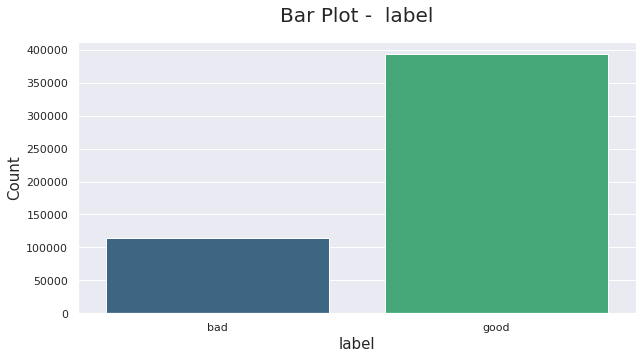

In [ ]:
# Status count plot
CatPlots('label', df)

> Majority of the sites are good

##### Numerical Analysis

In [ ]:
data = df

In [ ]:
def count_digits(string):
    total_number = 0
    for char_ in list(map(str, "0123456789")):
        total_number += string.lower().count(char_)
    return total_number

def count_letter(string):
    total_letter = 0
    for char_ in list(map(str, "abcdefghijklmnopqrstuvwxyz")):
        total_letter += string.lower().count(char_)
    return total_letter 
                
    
features = ["total_digits_domain", "total_digits_path", "total_digits_url", 
               "total_letter_domain", "total_letter_path", "total_letter_url",
               "len_domain", "len_url", "len_path"]

new_data = {"len_domain": [], 
            "len_path": [],
            "len_url": [], 
            "total_digits_domain": [],
            "total_digits_path": [], 
            "total_digits_url": [],
            "total_letter_domain": [],
            "total_letter_path": [], 
            "total_letter_url": []}
for index, current in enumerate(data["url"]):
    url_split = current.split("/", 1)
    if len(url_split) == 2:
        domain, path = url_split[0], url_split[1]
    else:
        domain, path = url_split[0], ""
   
    new_data["total_digits_domain"].append(count_digits(domain))
    new_data["total_digits_path"].append(count_digits(path))
    new_data["total_digits_url"].append(count_digits(current))
    
    new_data["total_letter_domain"].append(count_letter(domain))
    new_data["total_letter_path"].append(count_letter(path))
    new_data["total_letter_url"].append(count_letter(current))
    
    new_data["len_domain"].append(len(domain))
    new_data["len_path"].append(len(path))
    new_data["len_url"].append(len(current))

In [ ]:
for feature in features:
    data[feature] = new_data[feature]

In [ ]:
def get_histplot_central_tendency(df: dict, fields: list, target: str):
    colors = sb.color_palette('cool')
    for field in fields:
        f, (ax1) = plt.subplots(figsize=(10, 3), dpi=100)
        v_dist_1 = df[field].values
        
        for spline in ['top', 'right', 'left']:
            ax1.spines[spline].set_visible(False)
        
        sb.histplot(v_dist_1, ax=ax1, palette=colors, kde=True)

        mean=df[field].mean()
        median=df[field].median()
        mode=df[field].mode().values[0]

        ax1.axvline(mean, color='r', linestyle='--', label="Mean")
        ax1.axvline(median, color='g', linestyle='-', label="Median")
        ax1.axvline(mode, color='b', linestyle='-', label="Mode")
        ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
        ax1.set_xlabel(f'count', fontsize=13, color = '#333F4B')
        ax1.set_ylabel(f'{field}', fontsize=13, color = '#333F4B')
        ax1.legend()
        plt.grid(False)
        plt.plot(color="white", lw=3)
        f.suptitle(f"Representation Histogram for {field} - {target}", fontsize=18)

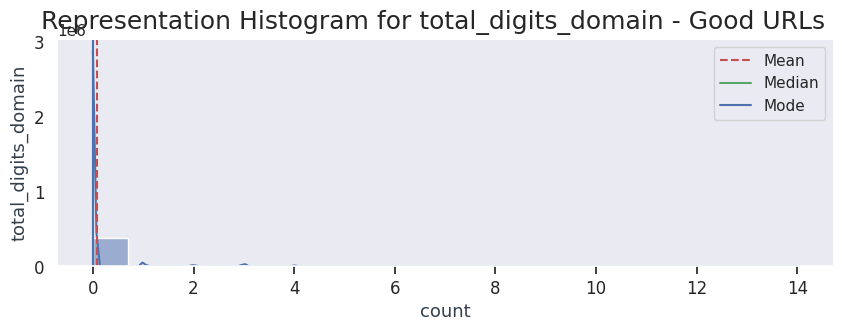

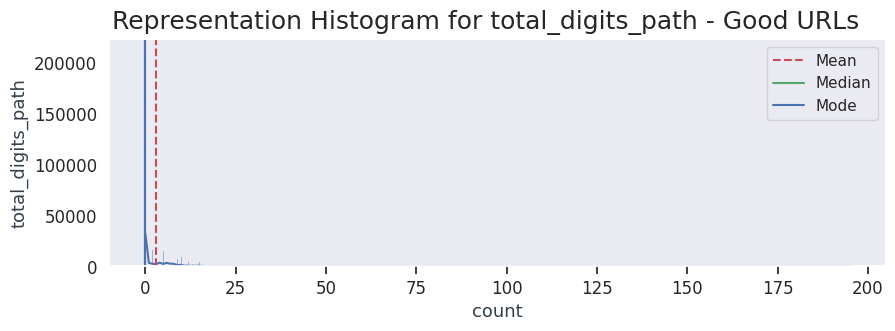

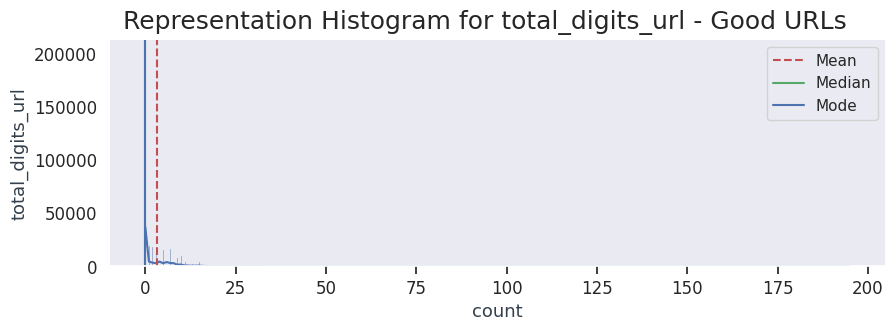

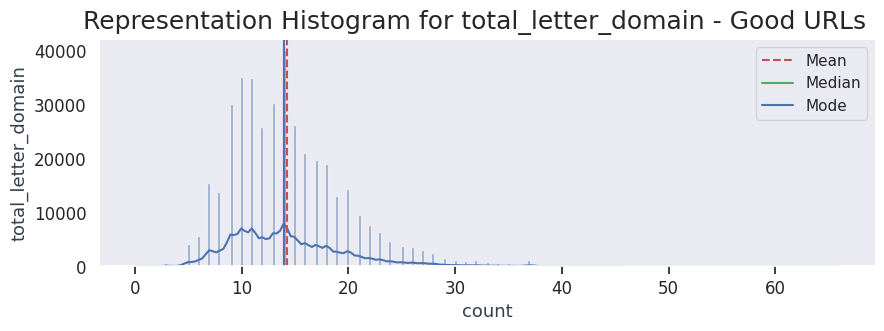

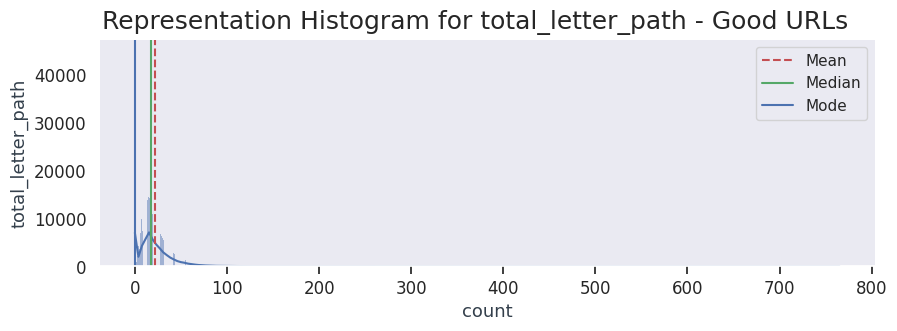

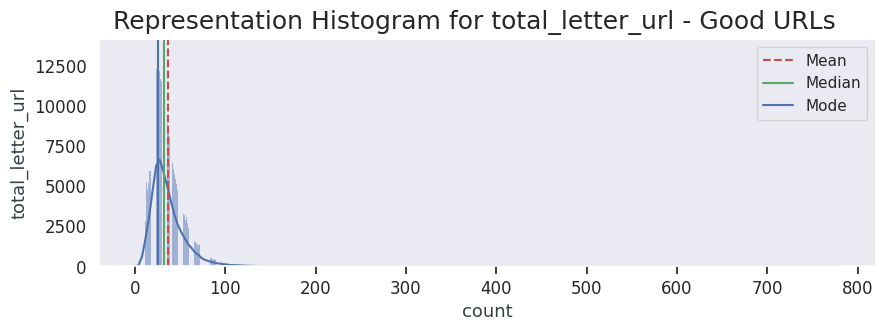

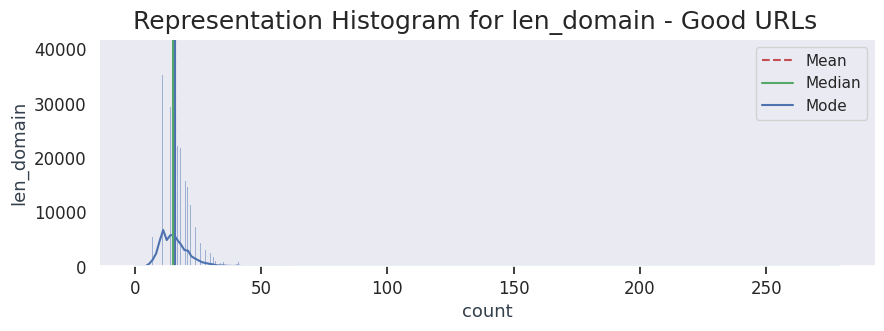

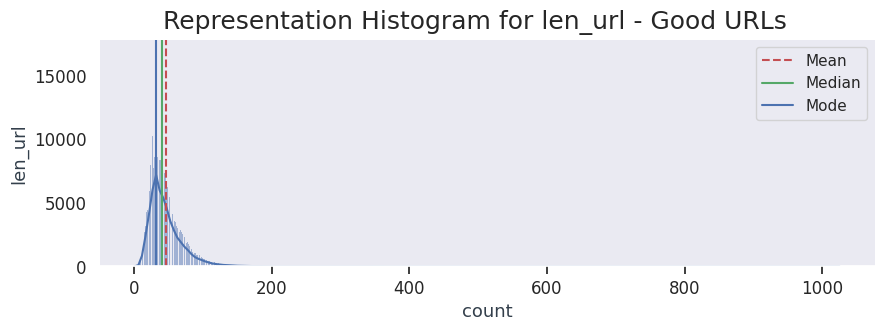

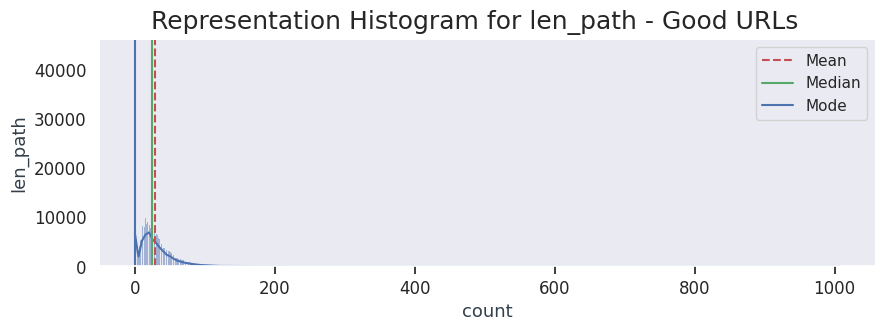

In [ ]:
get_histplot_central_tendency(data.query('label == "good"'), features, "Good URLs")

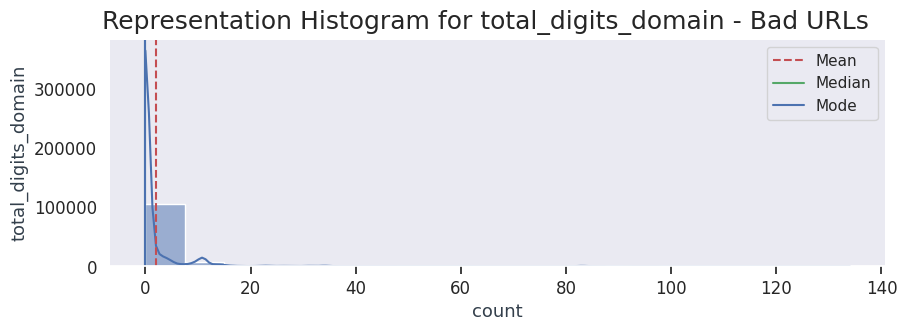

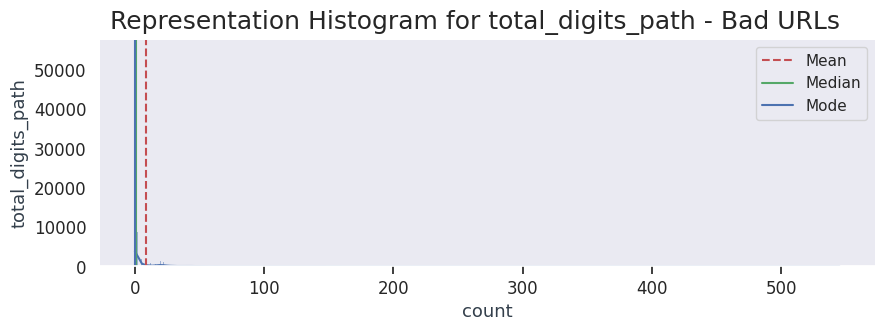

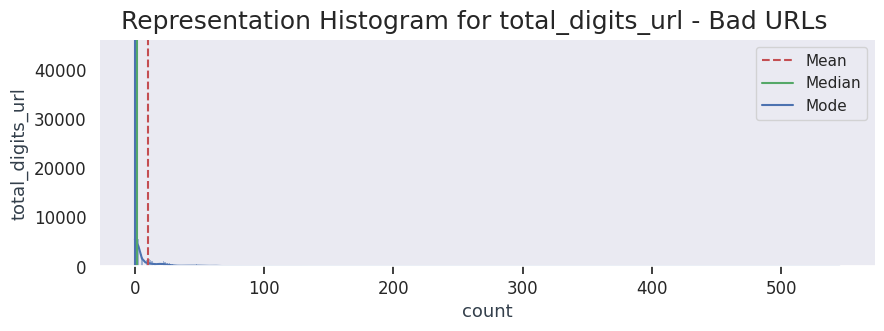

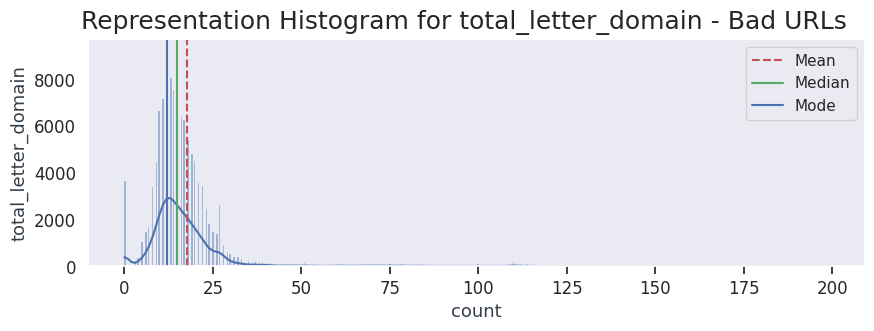

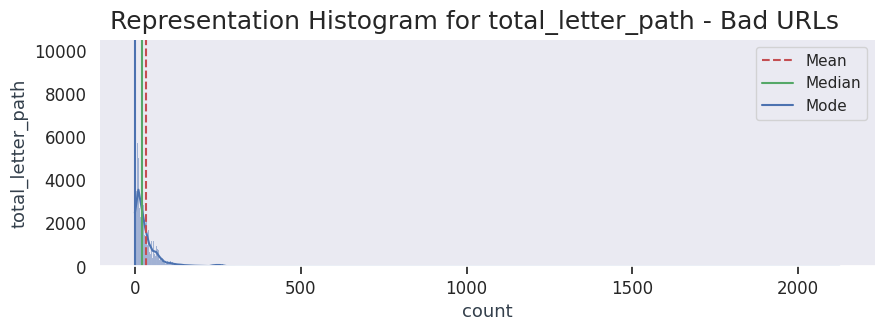

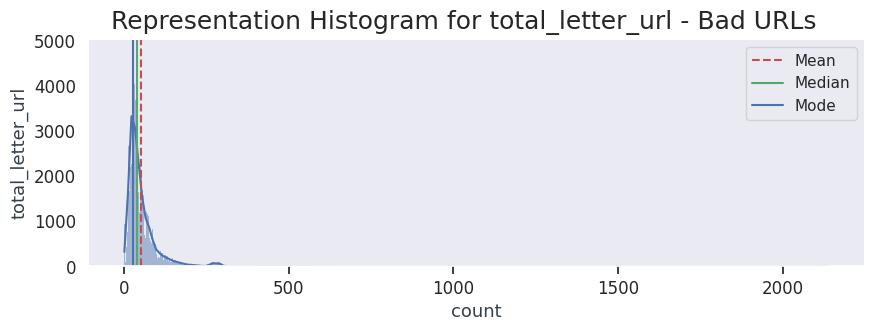

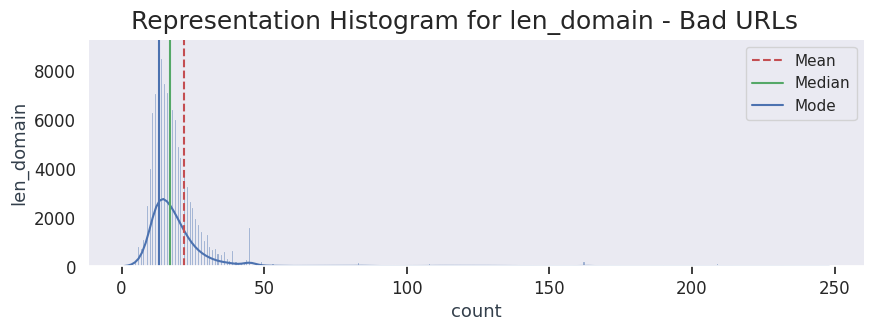

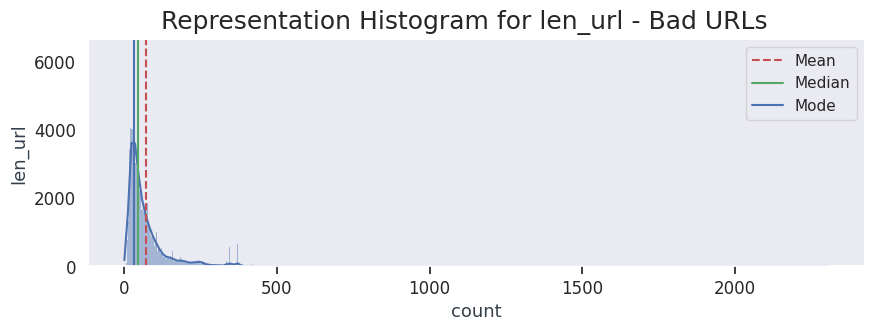

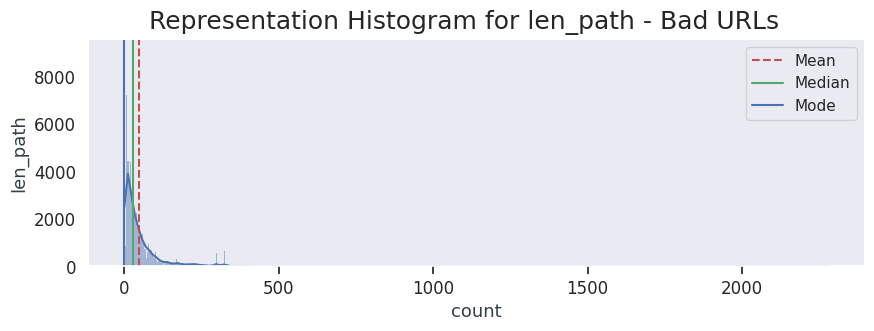

In [ ]:
get_histplot_central_tendency(data.query('label == "bad"'), features, "Bad URLs")

In [ ]:
def dict_to_dataframe(dictionary: dict):
    pandas_to = {"name": [], "total": []}
    for name, value in dictionary.items():
        if len(name.replace(" ", "")) > 0:
            pandas_to["name"].append(name)
            pandas_to["total"].append(value)
    return pd.DataFrame(pandas_to).sort_values(by=['total'], ascending=False)

In [ ]:
total_suffix_good = {}
total_suffix_bad = {}
for current, target in zip(data["url"], data["label"]):
    url_tldextract = tldextract.extract(current)
    suffix_tld = url_tldextract.suffix
    
    if target == "good":
        if suffix_tld not in total_suffix_good:
            total_suffix_good[suffix_tld] = 0
        total_suffix_good[suffix_tld] += 1
        
    if target == "bad":
        if suffix_tld not in total_suffix_bad:
            total_suffix_bad[suffix_tld] = 0
        total_suffix_bad[suffix_tld] += 1

In [ ]:
df_tld_top_bad = dict_to_dataframe(total_suffix_bad)
df_tld_top_good = dict_to_dataframe(total_suffix_good)

In [ ]:
def bar_plot_data(df: dict, subtitle: str, figsize=(5, 4), inverted_x=True):
    fig, ax1 = plt.subplots(figsize=figsize, dpi=100)
    
    for spline in ['top', 'right', 'left']:
        ax1.spines[spline].set_visible(False)

    sb.barplot(data=df, palette='cool', x="name", y="total")
    ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
    ax1.set_xlabel(f'{"name"}', fontsize=13, color = '#333F4B')
    ax1.set_ylabel(f'{"count"}', fontsize=13, color = '#333F4B')
    
    if inverted_x:
        plt.xticks(rotation=90)
        
    plt.plot(color="white", lw=3)
    fig.suptitle(subtitle, fontsize=18)
    plt.show()

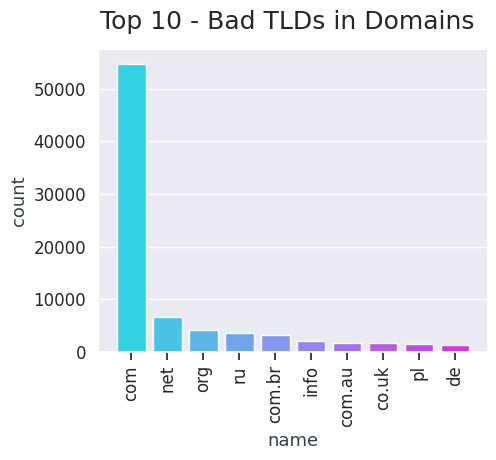

In [ ]:
bar_plot_data(df=df_tld_top_bad.head(10), subtitle="Top 10 - Bad TLDs in Domains")

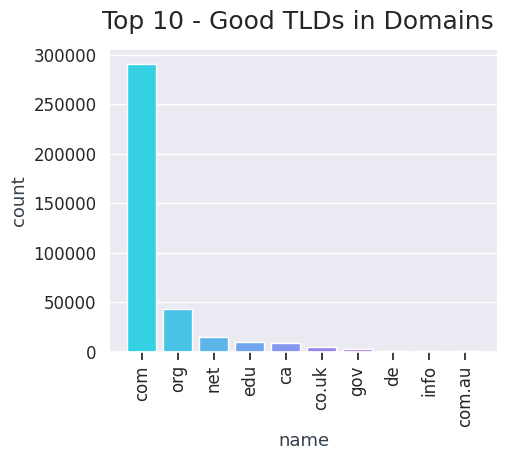

In [ ]:
bar_plot_data(df=df_tld_top_good.head(10), subtitle="Top 10 - Good TLDs in Domains")

In [ ]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, data):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {data[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {data[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {data[column].mode()}")

In [ ]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, data):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {data[column].max() - data[column].min()}")
    elif measure == 'IQR':
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {data[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {data[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {data[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {data[column].kurt()}")

In [ ]:
# Distribution and Boxplot functions
def NumericalPlots(column, data1, data2):
  fig, ax = plt.subplots(2,2, figsize = (12,10))
  # Outliers
  # Distribution plot
  sb.distplot(data1[column], hist=True, ax=ax[0,0], color = 'green')
  ax[0,0].set_title('Outliers: Freq dist '+ column, fontsize=10)
  ax[0,0].set_xlabel(column, fontsize=8)
  ax[0,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sb.boxplot(y = data1[column], ax = ax[0,1], color = 'green')
  ax[0,1].set_title(f'Outliers: Box Plot - {column}')
  ax[0,1].set_xlabel(column)

  # No outliers
  # Distribution plot
  sb.distplot(data2[column], hist=True, ax=ax[1,0], color = 'green')
  ax[1,0].set_title('No outliers: Freq dist '+ column, fontsize=10)
  ax[1,0].set_xlabel(column, fontsize=8)
  ax[1,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sb.boxplot(y = data2[column], ax = ax[1,1], color = 'green')
  ax[1,1].set_title(f'No outliers: Box Plot - {column}')
  ax[1,1].set_xlabel(column)
  plt.show()

In [ ]:
# Numerical columns
numerical = data.select_dtypes(exclude = 'object').columns.tolist()
numerical

['total_digits_domain',
 'total_digits_path',
 'total_digits_url',
 'total_letter_domain',
 'total_letter_path',
 'total_letter_url',
 'len_domain',
 'len_url',
 'len_path']

In [ ]:
# Mean
MeasureCentral('mean', numerical, df)

total_digits_domain column mean = 0.5098246042949865
total_digits_path column mean = 4.234911158605351
total_digits_url column mean = 4.744735762900338
total_letter_domain column mean = 15.025349174678034
total_letter_path column mean = 24.622911063967383
total_letter_url column mean = 39.64826023864541
len_domain column mean = 17.178733665091997
len_url column mean = 51.46702063896403
len_path column mean = 33.29318251721228


In [ ]:
# Median
MeasureCentral('median', numerical, df)

total_digits_domain column median = 0.0
total_digits_path column median = 0.0
total_digits_url column median = 1.0
total_letter_domain column median = 14.0
total_letter_path column median = 18.0
total_letter_url column median = 33.0
len_domain column median = 16.0
len_url column median = 41.0
len_path column median = 24.0


In [ ]:
# Mode
MeasureCentral('mode', numerical, df)

total_digits_domain column mode = 0    0
dtype: int64
total_digits_path column mode = 0    0
dtype: int64
total_digits_url column mode = 0    0
dtype: int64
total_letter_domain column mode = 0    14
dtype: int64
total_letter_path column mode = 0    0
dtype: int64
total_letter_url column mode = 0    26
dtype: int64
len_domain column mode = 0    16
dtype: int64
len_url column mode = 0    31
dtype: int64
len_path column mode = 0    0
dtype: int64


In [ ]:
# Range
MeasureDistribution('range', numerical, df)

total_digits_domain column range = 134
total_digits_path column range = 545
total_digits_url column range = 545
total_letter_domain column range = 199
total_letter_path column range = 2124
total_letter_url column range = 2141
len_domain column range = 279
len_url column range = 2306
len_path column range = 2281


In [ ]:
# IQR
MeasureDistribution('IQR', numerical, df)

total_digits_domain column IQR = 0.0
total_digits_path column IQR = 6.0
total_digits_url column IQR = 6.0
total_letter_domain column IQR = 7.0
total_letter_path column IQR = 21.0
total_letter_url column IQR = 23.0
len_domain column IQR = 7.0
len_url column IQR = 30.0
len_path column IQR = 29.0


In [ ]:
# Variance
MeasureDistribution('var', numerical, df)

total_digits_domain column variance = 14.254738402254423
total_digits_path column variance = 100.74646492125491
total_digits_url column variance = 127.72291957640017
total_letter_domain column variance = 71.3098888705098
total_letter_path column variance = 821.5605452036721
total_letter_url column variance = 913.7776757949542
len_domain column variance = 142.5245916403769
len_url column variance = 1835.8102373931158
len_path column variance = 1600.582908875954


In [ ]:
# Standard Deviation
MeasureDistribution('std', numerical, df)

total_digits_domain column std = 3.775544782181033
total_digits_path column std = 10.037253853582408
total_digits_url column std = 11.301456524554707
total_letter_domain column std = 8.444518273442826
total_letter_path column std = 28.662877475990996
total_letter_url column std = 30.228755776494577
len_domain column std = 11.938366372346634
len_url column std = 42.84635617404491
len_path column std = 40.00728569743209


In [ ]:
# Skew
MeasureDistribution('skew', numerical, df)

total_digits_domain column skew = 16.224476277004012
total_digits_path column skew = 7.938386479342745
total_digits_url column skew = 7.489908575138134
total_letter_domain column skew = 5.627192435210479
total_letter_path column skew = 7.1823021669676645
total_letter_url column skew = 6.576244157278235
len_domain column skew = 8.905174541112567
len_url column skew = 6.420272571840436
len_path column skew = 6.935778055062862


In [ ]:
# Kurtosis
MeasureDistribution('kurt', numerical, df)

total_digits_domain column kurt = 341.9811247080065
total_digits_path column kurt = 133.1656226846831
total_digits_url column kurt = 103.688563986949
total_letter_domain column kurt = 57.45827541508931
total_letter_path column kurt = 165.61243970607987
total_letter_url column kurt = 137.62115155746787
len_domain column kurt = 114.05256037125963
len_url column kurt = 103.36581526630194
len_path column kurt = 128.5770547031847


<Figure size 1440x576 with 0 Axes>

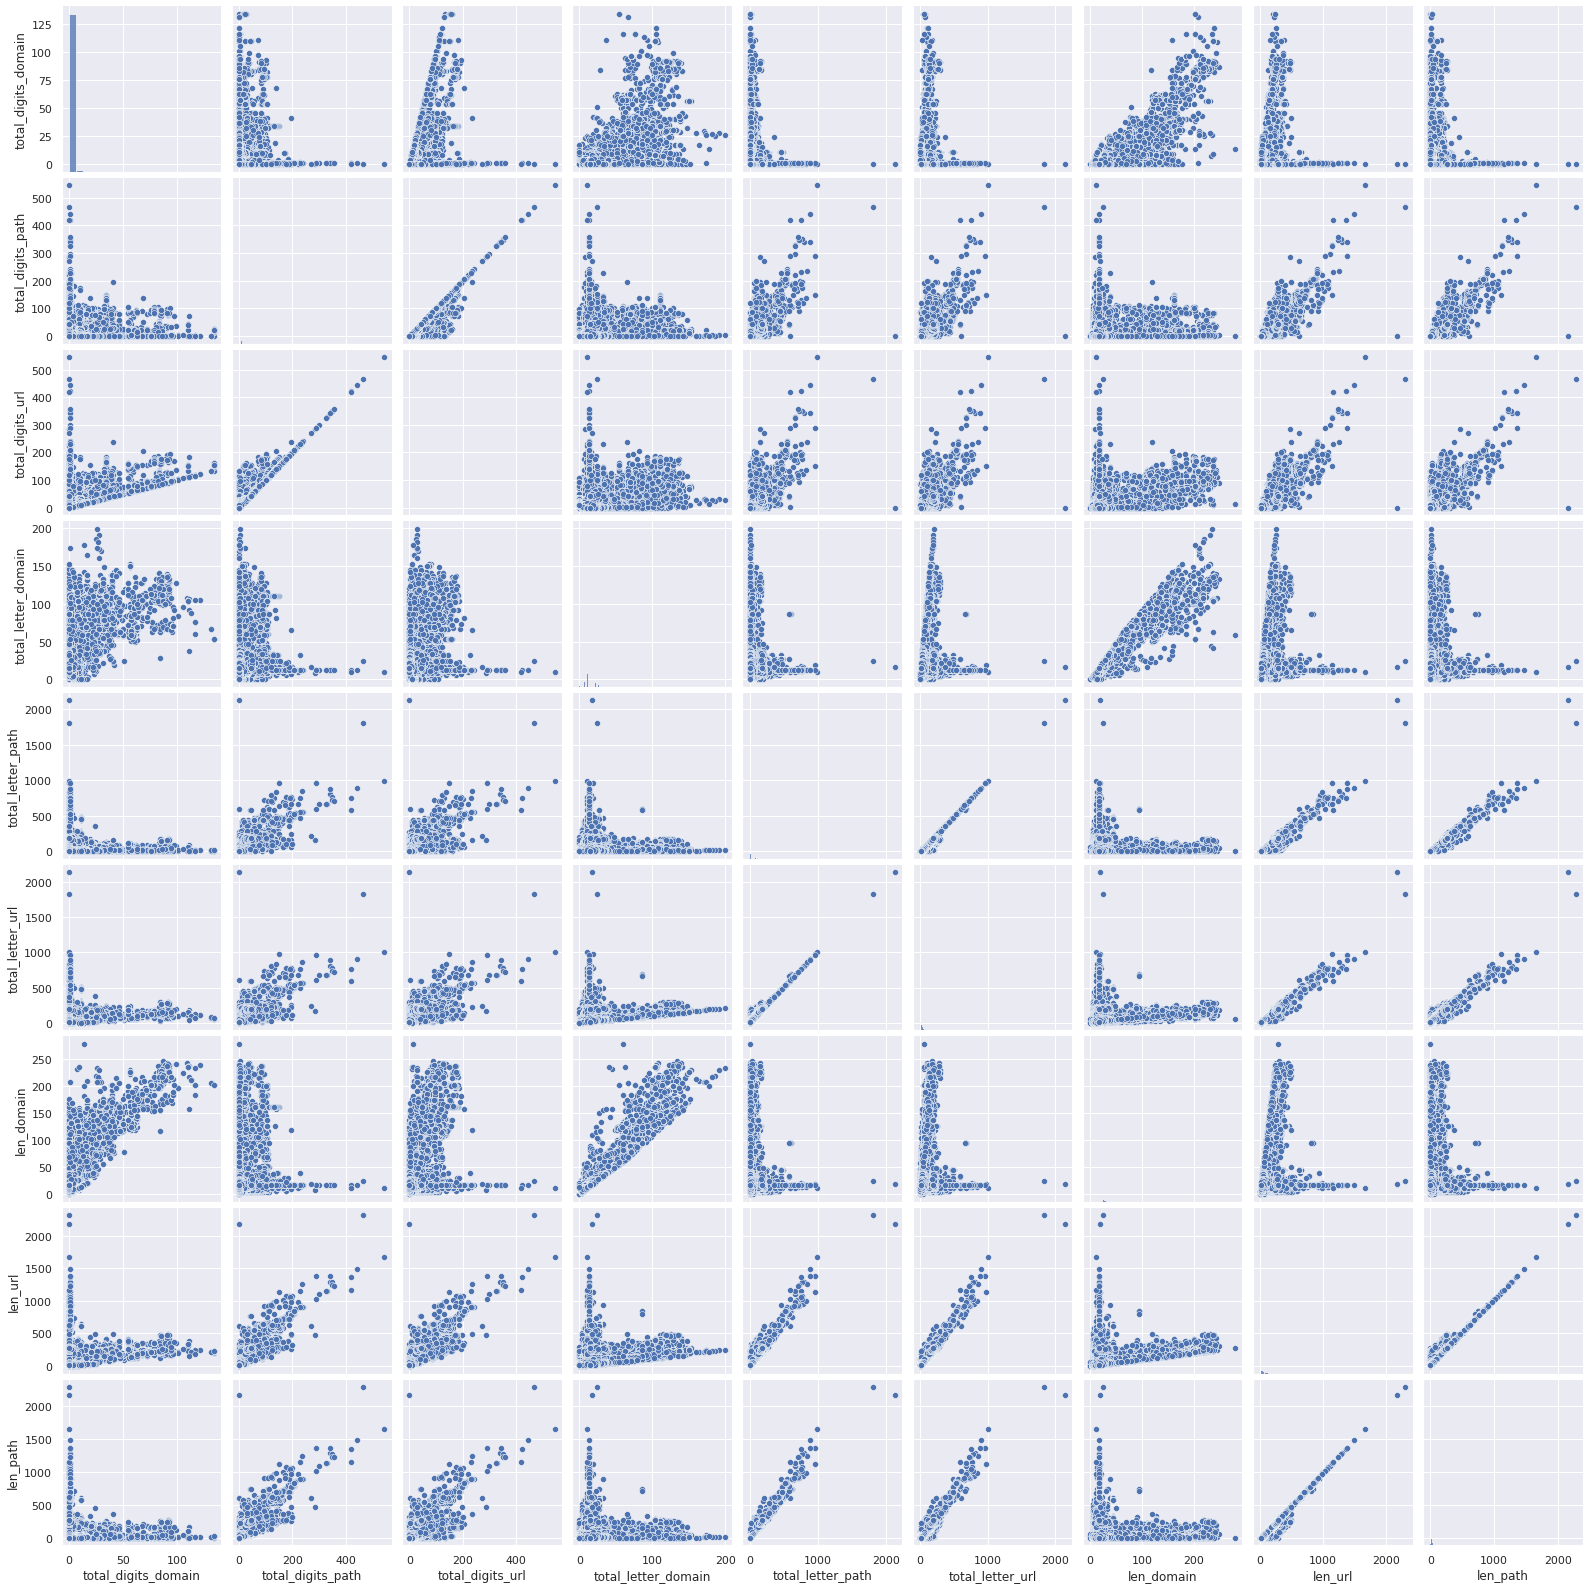

In [ ]:
# Explore the types of relationships across the entire data set.
plt.figure(figsize=(20,8))
sb.pairplot(df)

> From the pairplots:
* 


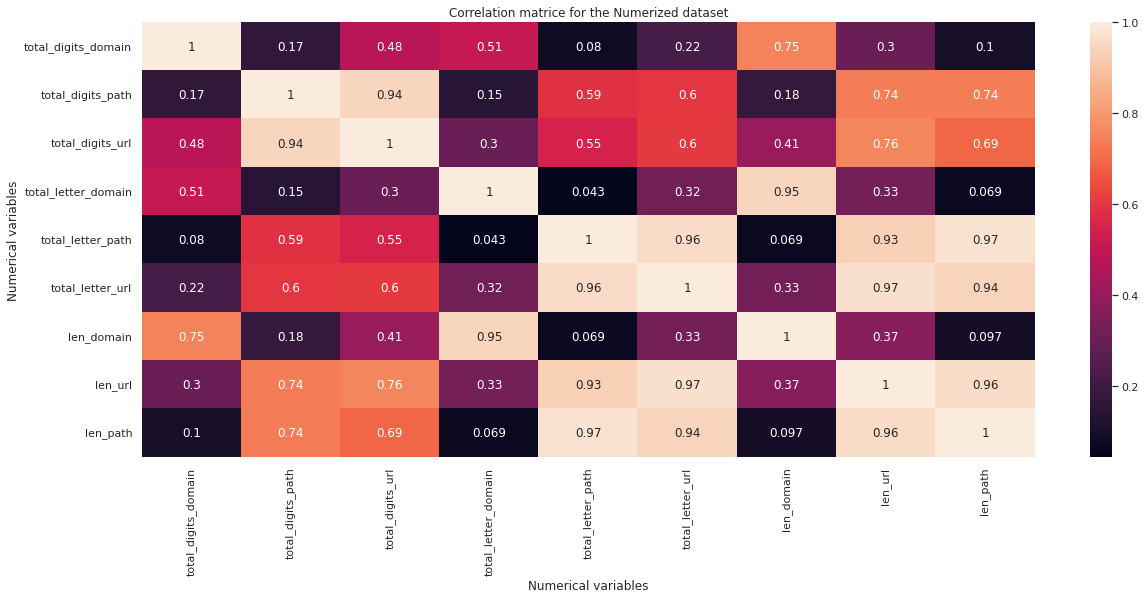

In [ ]:
# Heatmap of correlation
plt.figure(figsize=(20,8))
corr_matrix = df.corr(method = 'pearson')

sb.heatmap(corr_matrix, annot = True)

plt.title("Correlation matrice for the Numerized dataset")

plt.xlabel("Numerical variables")

plt.ylabel("Numerical variables")

plt.show()

In [ ]:
# defining a function to plot regression relation between two variables

def cor(col1,col2,d):
  ans = sb.regplot(x = col1, y = col2, data = d, scatter_kws = {"color": "red"}, line_kws = {"color": "black"})
  return ans

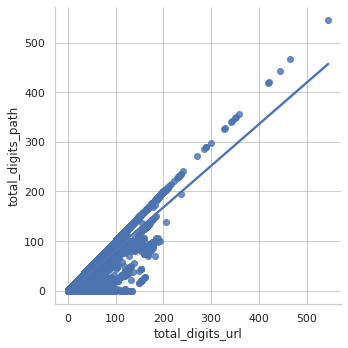

In [ ]:
# total_digits_url and total_digits_path
sb.set_style('whitegrid')
sb.lmplot(x='total_digits_url',y='total_digits_path',data=df)

##### Multicollinearity Check

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

In [ ]:
# calculating VIF for each feature
# VIF function
def VIF(data):
  # Correlation matrix
  correlation = data.corr()
  # Inverse matrix
  inv_corr = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
  return inv_corr

In [ ]:
VIF(df)

,total_digits_domain,total_digits_path,total_digits_url,total_letter_domain,total_letter_path,total_letter_url,len_domain,len_url,len_path
total_digits_domain,7.800195e+11,2.073675e+12,-2.334857e+12,-6.640696e+11,-2.254024e+12,2.377163e+12,24669.801974,-89199.761544,83328.301026
total_digits_path,2.073675e+12,5.512848e+12,-6.207197e+12,-1.765423e+12,-5.992303e+12,6.319668e+12,65597.386481,-236789.081536,221154.281475
total_digits_url,-2.334857e+12,-6.207197e+12,6.989000e+12,1.987780e+12,6.747040e+12,-7.115637e+12,-73864.579931,266634.972254,-249076.273821
total_letter_domain,-6.656880e+11,-1.769726e+12,1.992625e+12,-1.177402e+12,-3.996405e+12,4.214733e+12,35494.325316,-128453.331646,120001.418182
total_letter_path,-2.259517e+12,-6.006907e+12,6.763483e+12,-3.996405e+12,-1.356483e+13,1.430589e+13,120245.271580,-434093.653393,405388.223671
total_letter_url,2.382957e+12,6.335070e+12,-7.132978e+12,4.214733e+12,1.430589e+13,-1.508744e+13,-126816.056299,457825.582190,-427689.740291
len_domain,2.467376e+04,6.560791e+04,-7.387643e+04,3.541520e+04,1.199767e+05,-1.265328e+05,30021.435996,-107964.126721,100827.333956
len_url,-8.921409e+04,-2.368272e+05,2.666779e+05,-1.281677e+05,-4.331243e+05,4.568032e+05,-107964.126721,389741.709072,-363994.087108
len_path,8.334173e+04,2.211900e+05,-2.491165e+05,1.197347e+05,4.044829e+05,-4.267349e+05,100827.333956,-363994.087108,340107.548366


> The features are highly collinear hence reduction techniques should be applied when using ML models. For this model, will use Tensor flow with vectorized independent variables.

##### Label Encoding

In [ ]:
# Understanding the columns
df.head()

,url,label,total_digits_domain,total_digits_path,total_digits_url,total_letter_domain,total_letter_path,total_letter_url,len_domain,len_url,len_path
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0,58,58,8,127,135,9,225,215
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,0,1,1,13,52,65,15,81,65
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0,47,47,15,96,111,16,177,160
3,mail.printakid.com/www.online.americanexpress....,bad,0,0,0,16,36,52,18,60,41
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0,21,21,18,64,82,19,116,96


In [ ]:
# Label encode Status column
df[['label']] = df[['label']].apply(LabelEncoder().fit_transform)
# Checking changes
df.head()

,url,label,total_digits_domain,total_digits_path,total_digits_url,total_letter_domain,total_letter_path,total_letter_url,len_domain,len_url,len_path
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,0,0,58,58,8,127,135,9,225,215
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,0,0,1,1,13,52,65,15,81,65
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,0,0,47,47,15,96,111,16,177,160
3,mail.printakid.com/www.online.americanexpress....,0,0,0,0,16,36,52,18,60,41
4,thewhiskeydregs.com/wp-content/themes/widescre...,0,0,21,21,18,64,82,19,116,96


> Will vectorize our URLs. Will use CountVectorizer and gather words using tokenizer, since there are words in urls that are more important than other words e.g ‘virus’, ‘.exe’ ,’.dat’ etc. Lets convert the URLs into a vector form.

### Creating a Copy of Cleaned Dataset

In [ ]:
df_cleaned = df.copy()

## Visualization

#### RegexpTokenizer

> A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
df.url[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [ ]:
# this will be pull letter which matches to expression
tokenizer.tokenize(df.url[233]) # using first row

['www',
 'egitimogretimci',
 'com',
 'wp',
 'admin',
 'images',
 'screenshots',
 'index',
 'htm']

In [ ]:
# Tokenizing the entire dataset
df['text_tokenized'] = df.url.map(lambda t: tokenizer.tokenize(t))
df.sample(5)

,url,label,total_digits_domain,total_digits_path,total_digits_url,total_letter_domain,total_letter_path,total_letter_url,len_domain,len_url,len_path,text_tokenized
286940,backcountry.com/store/review/200010878/Good-Sm...,1,0,9,9,14,32,46,15,64,48,"[backcountry, com, store, review, Good, Small,..."
337007,filecatch.com/?q=photos+nuit+de+noces,1,0,0,0,12,18,30,13,37,23,"[filecatch, com, q, photos, nuit, de, noces]"
45269,www045.paypal.co.uk.41162.ssl-540.mx/js/webapp...,0,11,12,23,18,31,49,36,90,53,"[www, paypal, co, uk, ssl, mx, js, webapps, uk..."
279149,andreleitealves.com/,1,0,0,0,18,0,18,19,20,0,"[andreleitealves, com]"
134826,the3wfactory.com/accounting/sistema/css/upgrad...,0,1,0,1,14,32,46,16,54,37,"[the, wfactory, com, accounting, sistema, css,..."


In [ ]:
# Joining the words
df['text_sent'] = df['text_tokenized'].map(lambda l: ' '.join(l))
df.sample(5)

,url,label,total_digits_domain,total_digits_path,total_digits_url,total_letter_domain,total_letter_path,total_letter_url,len_domain,len_url,len_path,text_tokenized,text_sent
147310,backinsu.blogspot.com/,1,0,0,0,19,0,19,21,22,0,"[backinsu, blogspot, com]",backinsu blogspot com
231277,press-releases.techwhack.com/24616-diskeeper-c...,1,0,5,5,25,26,51,28,64,35,"[press, releases, techwhack, com, diskeeper, c...",press releases techwhack com diskeeper corpora...
133025,builder.ezywebs.com.au/webmaill/web,0,0,0,0,19,11,30,22,35,12,"[builder, ezywebs, com, au, webmaill, web]",builder ezywebs com au webmaill web
32408,us.battle.net.llus.asia/login/en/?app=com-d3&a...,0,0,2,2,19,39,58,23,78,54,"[us, battle, net, llus, asia, login, en, app, ...",us battle net llus asia login en app com d amp...
56120,assamagribusiness.nic.in/RAMIE.pdf,1,0,0,0,22,8,30,24,34,9,"[assamagribusiness, nic, in, RAMIE, pdf]",assamagribusiness nic in RAMIE pdf


#### 1. Visualize some important keys using word cloud

In [ ]:
#sliceing classes
bad_sites = df[df.label == 0]
good_sites = df[df.label == 1]

In [ ]:
bad_sites.sample(5)

,url,label,total_digits_domain,total_digits_path,total_digits_url,total_letter_domain,total_letter_path,total_letter_url,len_domain,len_url,len_path,text_tokenized,text_sent
38243,nmpnetwork.com/remax/,0,0,0,0,13,5,18,14,21,6,"[nmpnetwork, com, remax]",nmpnetwork com remax
127460,dating.singleactive.ch/libraries/joomla/contro...,0,0,37,37,20,95,115,22,163,140,"[dating, singleactive, ch, libraries, joomla, ...",dating singleactive ch libraries joomla contro...
339,diagsv7.com/html/dp1207-xforex.htm,0,1,4,5,9,15,24,11,34,22,"[diagsv, com, html, dp, xforex, htm]",diagsv com html dp xforex htm
10462,hlanz.org/billing/system/info/update/webscr/sc...,0,0,24,24,8,46,54,9,87,77,"[hlanz, org, billing, system, info, update, we...",hlanz org billing system info update webscr sc...
32538,www.rdsw.cn/user/?us.battle.net/login/en/?ref=...,0,0,2,2,9,61,70,11,93,81,"[www, rdsw, cn, user, us, battle, net, login, ...",www rdsw cn user us battle net login en ref mo...


In [ ]:
good_sites.sample(5)

,url,label,total_digits_domain,total_digits_path,total_digits_url,total_letter_domain,total_letter_path,total_letter_url,len_domain,len_url,len_path,text_tokenized,text_sent
235320,rivals.yahoo.com/ncaa/football/recruiting/play...,1,0,6,6,14,39,53,16,68,51,"[rivals, yahoo, com, ncaa, football, recruitin...",rivals yahoo com ncaa football recruiting play...
250795,tweetmeme.com/story/177929473/l-i-l-i-t-h-el-n...,1,0,9,9,12,81,93,13,128,114,"[tweetmeme, com, story, l, i, l, i, t, h, el, ...",tweetmeme com story l i l i t h el nuevo video...
393186,mp3raid.com/music/big_scoob.html,1,1,0,1,9,17,26,11,32,20,"[mp, raid, com, music, big, scoob, html]",mp raid com music big scoob html
274003,amazon.com/Astro-Boy-Collection-Box-Set/dp/B00...,1,0,4,4,9,32,41,10,53,42,"[amazon, com, Astro, Boy, Collection, Box, Set...",amazon com Astro Boy Collection Box Set dp B A...
184287,espn.go.com/blog/bigeast/post/_/id/25187/big-e...,1,0,5,5,9,47,56,11,77,65,"[espn, go, com, blog, bigeast, post, id, big, ...",espn go com blog bigeast post id big east cham...


create a function to visualize the important keys from url

In [ ]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 

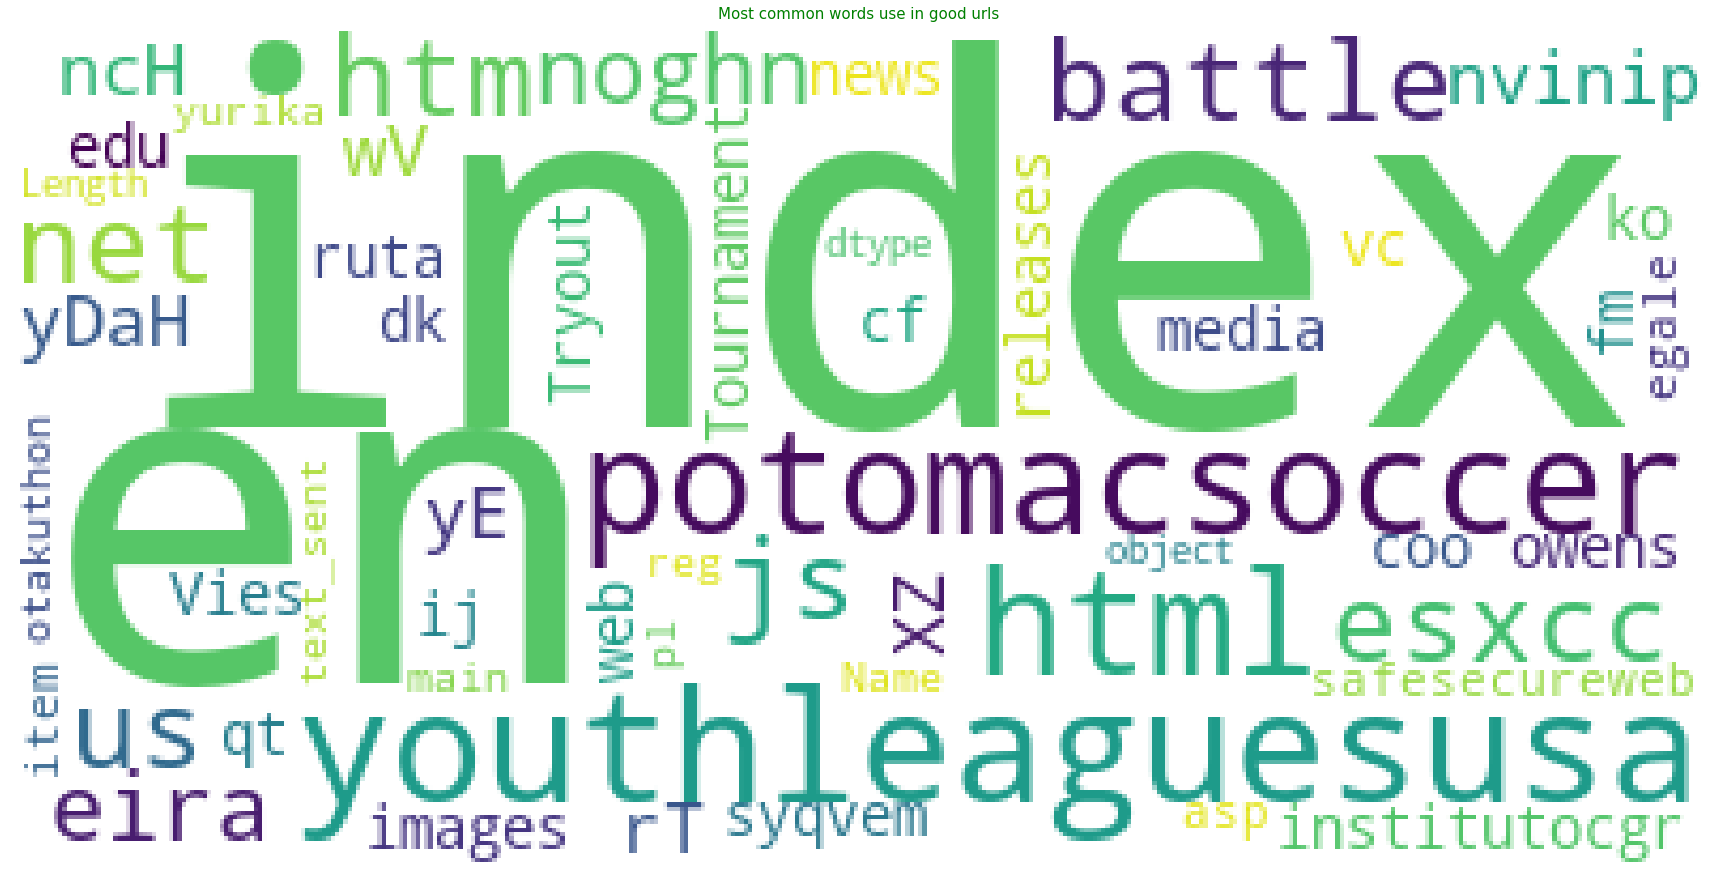

In [ ]:
# Visualization for the good sites
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)
common_text = str(data)
plot_wordcloud(common_text,max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

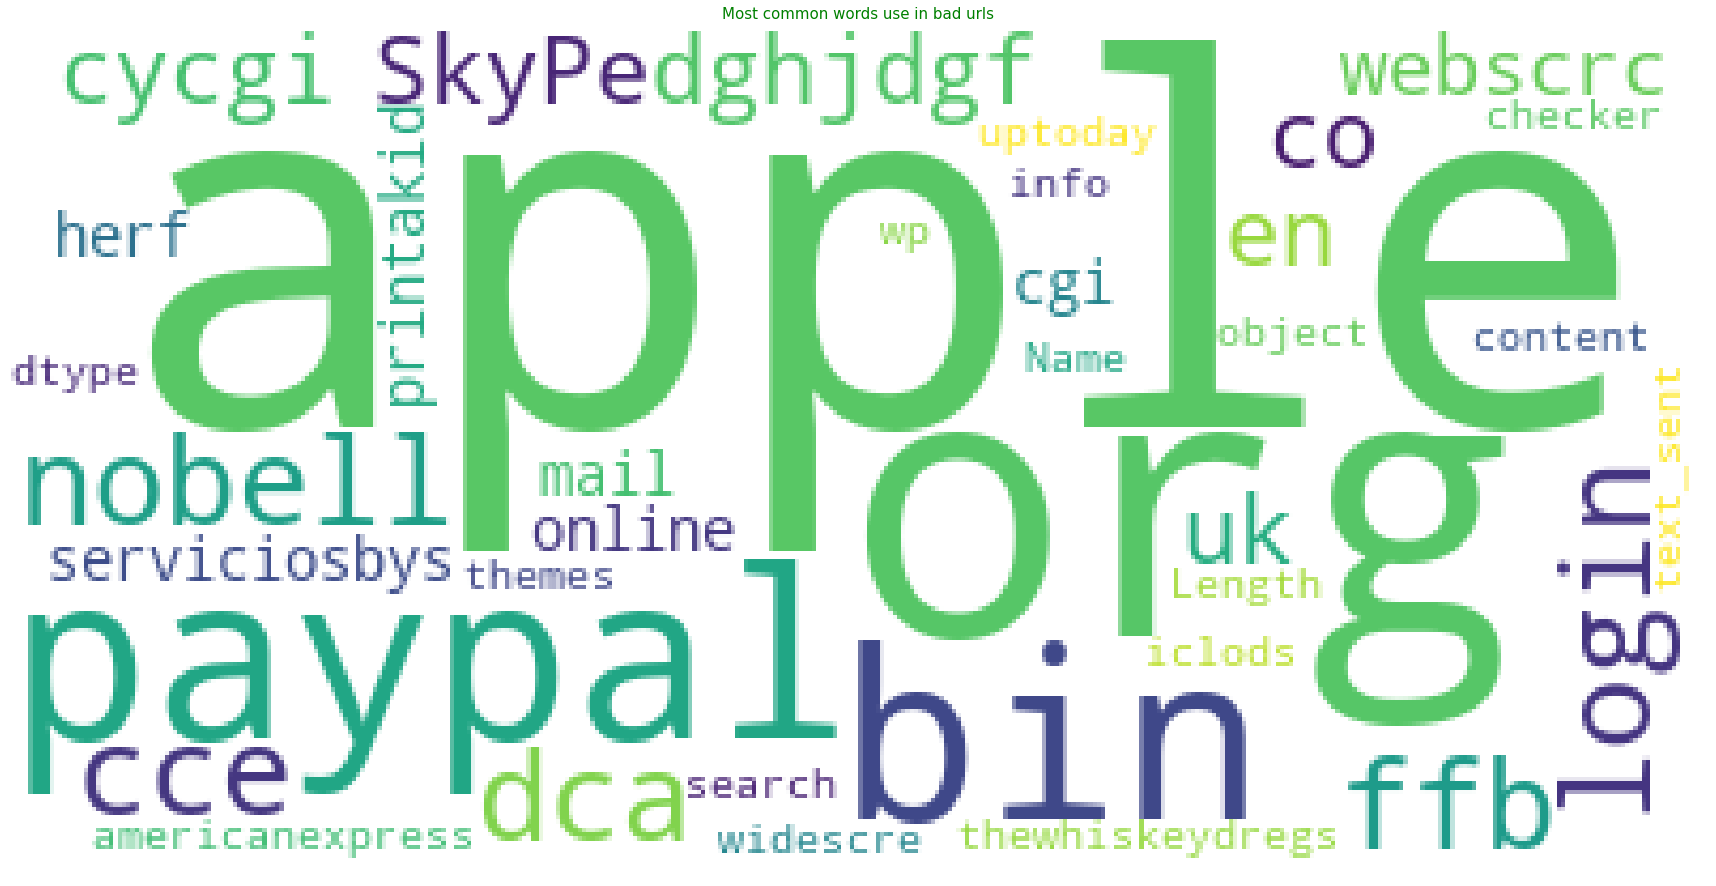

In [ ]:
# For the bad sites
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)
common_text = str(data)
plot_wordcloud(common_text, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

#### 2. Visualize internal links, it will shows all redirect links.

Scrape any website
* First, setting up the Chrome webdriver so we can scrape dynamic web pages.

Chrome webdriver
* WebDriver tool use for automated testing of webapps across many browsers. It provides capabilities for navigating to web pages, user input and more

In [ ]:
!apt install chromium-chromedriver
!apt-get update 
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 42 not upgraded.
Need to get 89.8 MB of archives.
After this operation, 302 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 101.0.4951.64-0ubuntu0.18.04.1 [1,142 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 101.0.4951.64-0ubuntu0.18

In [ ]:
browser = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

* After set up the Chrome driver create two lists.
* First list named list_urls holds all the pages you’d like to scrape.
* Second, create an empty list where you’ll append links from each page.

In [ ]:
#here i take phishing sites
list_urls = ['https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html']  
links_with_text = []

* I took some phishing site to see were the hackers redirect(on different link) us.
* Use the BeautifulSoup library to extract only relevant hyperlinks for Google, i.e. links only with '<'a'>' tags with href attributes.

**BeautifulSoup**

* It is use for getting data out of HTML, XML, and other markup languages.

In [ ]:
for url in list_urls:
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

**Turn the URL’s into a Dataframe**

* After you get the list of your websites with hyperlinks turn them into a Pandas DataFrame with columns “from” (URL where the link resides) and “to” (link destination URL)

In [ ]:
df_url = pd.DataFrame(links_with_text, columns=["from", "to"])
df_url.head()

,from,to
0,https://scikit-learn.org/stable/modules/genera...,../../index.html
1,https://scikit-learn.org/stable/modules/genera...,../../install.html
2,https://scikit-learn.org/stable/modules/genera...,../../user_guide.html
3,https://scikit-learn.org/stable/modules/genera...,../classes.html
4,https://scikit-learn.org/stable/modules/genera...,../../auto_examples/index.html


Draw a graph

* Finally, use the aforementioned DataFrame to visualize an internal link structure by feeding it to the Networkx method from_pandas_edgelist first and draw it by calling nx.draw

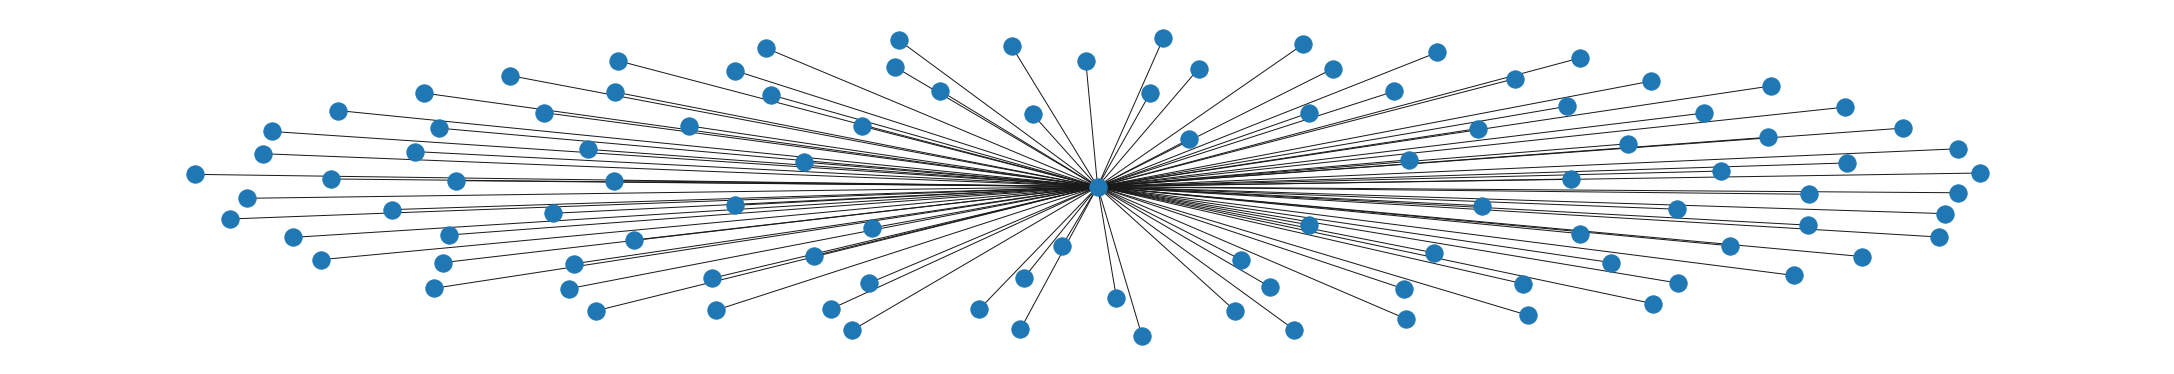

In [ ]:
GA = nx.from_pandas_edgelist(df_url, source="from", target="to")
nx.draw(GA, with_labels=False)

## 7. Modelling

### TF Model With Class Imbalance

> There is a huge class imbalance with our data set with around 100k bad links and around 300k good links.

In [ ]:
# Loading the Dataset 
df = df.copy()

In [ ]:
# Test-train split
tokenizer = Tokenizer(oov_token="<OOV>")
split = round(len(df)*0.8)
train_reviews = df['text_sent'][:split]
train_label = df['label'][:split]
test_reviews = df['text_sent'][split:]
test_label = df['label'][split:]

In [ ]:
# Changing the data to string values
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in train_reviews:
    training_sentences.append(str(row))
for row in train_label:
    training_labels.append(row)
for row in test_reviews:
    testing_sentences.append(str(row))
for row in test_label:
    testing_labels.append(row)

In [ ]:
# Assigning parameters
vocab_size = 400000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [ ]:
# Tokenizing the text data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [ ]:
# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           6400000   
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 6,400,109
Trainable params: 6,400,109
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Converting the labels to an array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
## Training the dataset
# num_epochs = 1
# history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

### TF Model Without Class Imbalance

> We will use SMOTE to balance the training class at 50% good and 50% bad

In [ ]:
# Test-train split
tokenizer = Tokenizer(oov_token="<OOV>")
split = round(len(df)*0.8)
train_reviews = df['url'][:split]
train_label = df['label'][:split]
test_reviews = df['url'][split:]
test_label = df['label'][split:]

In [ ]:
# Changing the data to string values
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in train_reviews:
    training_sentences.append(str(row))
for row in train_label:
    training_labels.append(row)
for row in test_reviews:
    testing_sentences.append(str(row))
for row in test_label:
    testing_labels.append(row)

In [ ]:
# Assigning parameters
vocab_size = 20000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [ ]:
# Tokenizing the text data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [ ]:
# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,       input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           320000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 6)                 102       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 320,109
Trainable params: 320,109
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Converting the labels to an array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
# Dealing with the class imbalance using SMOTE
counter = Counter(training_labels_final)
print('before',counter)
smt = SMOTE()
X_train_sm,y_train_sm = smt.fit_resample(padded,training_labels_final)
counter =Counter(y_train_sm)
print('after',counter)

before Counter({1: 320862, 0: 84895})
after Counter({0: 320862, 1: 320862})


In [ ]:
# Training the dataset
print('Training started ...')
t0= time.perf_counter()
num_epochs = 5
history = model.fit(X_train_sm,y_train_sm, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Training started ...
Epoch 1/5
20054/20054 [==============================] - 133s 7ms/step - loss: 0.2772 - accuracy: 0.8878 - val_loss: 0.3716 - val_accuracy: 0.8382
Epoch 2/5
20054/20054 [==============================] - 135s 7ms/step - loss: 0.2234 - accuracy: 0.9155 - val_loss: 0.3675 - val_accuracy: 0.8397
Epoch 3/5
20054/20054 [==============================] - 131s 7ms/step - loss: 0.2155 - accuracy: 0.9183 - val_loss: 0.3713 - val_accuracy: 0.8427
Epoch 4/5
20054/20054 [==============================] - 133s 7ms/step - loss: 0.2008 - accuracy: 0.9239 - val_loss: 0.3372 - val_accuracy: 0.8472
Epoch 5/5
20054/20054 [==============================] - 133s 7ms/step - loss: 0.1708 - accuracy: 0.9366 - val_loss: 0.3346 - val_accuracy: 0.8582
Time taken 665.6984776520001 sec


<Figure size 432x288 with 0 Axes>

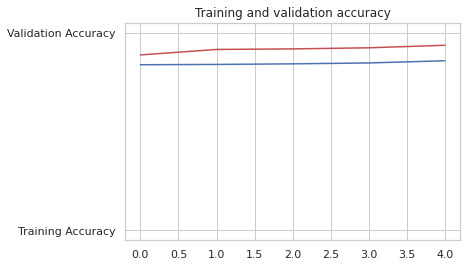

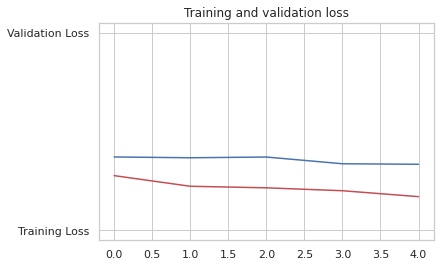

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

In [ ]:
# Predict based on the model we've trained
y_pred = model.predict(testing_padded).round(0).astype('int')
comparison_frame = pd.DataFrame({'Actual': testing_labels_final.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.sample(10)

,Actual,Predicted
7679,1,1
49827,1,1
77904,0,0
47756,1,1
14366,1,1
52604,1,1
50162,1,0
9382,1,1
50099,1,1
66412,1,1


In [ ]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(testing_labels_final.flatten(), y_pred.flatten())
print(cm)
print('Accuracy' , accuracy_score(testing_labels_final, y_pred))

[[18143 11261]
 [ 3127 68908]]
Accuracy 0.8581610623133115


## 8. Implementing the Solution

### Prediction Pipeline

In [ ]:
reccomendations = ("""Protections How to Protect Your Computer Below are some key steps to protecting your computer from intrusion:\n\n Keep Your Firewall Turned On: A firewall helps protect your computer from hackers who might try to gain access to crash it,\n
delete information, or even steal passwords or other sensitive information. Software firewalls are widely recommended for single\n
computers. The software is prepackaged on some operating systems or can be purchased for individual computers.\n
For multiple networked computers, hardware routers typically provide firewall protection.\n\n
Install or Update Your Antivirus Software: Antivirus software is designed to prevent malicious software programs from embedding on\n
your computer. If it detects malicious code, like a virus or a worm, it works to disarm or remove it. Viruses can infect computers\n
without users’ knowledge. Most types of antivirus software can be set up to update automatically.\n\n
Install or Update Your Antispyware Technology: Spyware is just what it sounds like—software that is surreptitiously installed on your\n
computer to let others peer into your activities on the computer. Some spyware collects information about you without your consent or\n
produces unwanted pop-up ads on your web browser. Some operating systems offer free spyware protection, and inexpensive software is\n
readily available for download on the Internet or at your local computer store. Be wary of ads on the Internet offering downloadable\n
antispyware—in some cases these products may be fake and may actually contain spyware or other malicious code.\n
It’s like buying groceries—shop where you trust.\n\n
Keep Your Operating System Up to Date: Computer operating systems are periodically updated to stay in tune with technology requirements\n
and to fix security holes. Be sure to install the updates to ensure your computer has the latest protection.\n\n
Be Careful What You Download: Carelessly downloading e-mail attachments can circumvent even the most vigilant anti-virus software.\n
Never open an e-mail attachment from someone you don’t know, and be wary of forwarded attachments from people you do know.\n
They may have unwittingly advanced malicious code.\n\n
Turn Off Your Computer: With the growth of high-speed Internet connections, many opt to leave their computers on and ready for action.\n
The downside is that being “always on” renders computers more susceptible. Beyond firewall protection, which is designed to fend off\n
unwanted attacks, turning the computer off effectively severs an attacker’s connection—be it spyware or a botnet that employs your\n
computer’s resources to reach out to other unwitting users.""")

In [ ]:
# Prediction function
def prediction():
  print("Insert the Link")
  data = input("Paste the Link Here\t")
  link = data
  print('Prediction Started ...')
  t0= time.perf_counter()
  data = str(data)
  tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
  tokenizer.fit_on_texts(data)
  word_index = tokenizer.word_index
  sequences = tokenizer.texts_to_sequences(data)
  padded_data = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
  score =model.predict(padded_data).round(0).astype('int')
  score =np.average(score)
  t1 = time.perf_counter() - t0
  print('Prediction Completed\nTime taken',t1 ,'sec')
  if score <= 0.2:
    print("The URL is probaly a phising URL. Kindly read through the following Reccomendations\n",reccomendations)
  else:
    print("The website is secure, kindly click the link to proceed")
    print(link)
    s = 'Thank You!'
  return(print(s))

Insert the Link


### Reccomendations

Protections
How to Protect Your Computer
Below are some key steps to protecting your computer from intrusion:

Keep Your Firewall Turned On: A firewall helps protect your computer from hackers who might try to gain access to crash it, delete information, or even steal passwords or other sensitive information. Software firewalls are widely recommended for single computers. The software is prepackaged on some operating systems or can be purchased for individual computers. For multiple networked computers, hardware routers typically provide firewall protection.

Install or Update Your Antivirus Software: Antivirus software is designed to prevent malicious software programs from embedding on your computer. If it detects malicious code, like a virus or a worm, it works to disarm or remove it. Viruses can infect computers without users’ knowledge. Most types of antivirus software can be set up to update automatically.

Install or Update Your Antispyware Technology: Spyware is just what it sounds like—software that is surreptitiously installed on your computer to let others peer into your activities on the computer. Some spyware collects information about you without your consent or produces unwanted pop-up ads on your web browser. Some operating systems offer free spyware protection, and inexpensive software is readily available for download on the Internet or at your local computer store. Be wary of ads on the Internet offering downloadable antispyware—in some cases these products may be fake and may actually contain spyware or other malicious code. It’s like buying groceries—shop where you trust.

Keep Your Operating System Up to Date: Computer operating systems are periodically updated to stay in tune with technology requirements and to fix security holes. Be sure to install the updates to ensure your computer has the latest protection.

Be Careful What You Download: Carelessly downloading e-mail attachments can circumvent even the most vigilant anti-virus software. Never open an e-mail attachment from someone you don’t know, and be wary of forwarded attachments from people you do know. They may have unwittingly advanced malicious code.

Turn Off Your Computer: With the growth of high-speed Internet connections, many opt to leave their computers on and ready for action. The downside is that being “always on” renders computers more susceptible. Beyond firewall protection, which is designed to fend off unwanted attacks, turning the computer off effectively severs an attacker’s connection—be it spyware or a botnet that employs your computer’s resources to reach out to other unwitting users.

In [ ]:
prediction()

Insert the Link
Paste the Link Here	facebook.com
Prediction Started ...
Prediction Completed
Time taken 0.0582434550015023 sec
The website is secure, kindly click the link to proceed
facebook.com
Thank You!


## 9. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






## 10. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

> Yes.

### b). Do we need other data to answer our question?

> No

### c). Did we have the right question?

> Yes